In [2]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
#Answer:

import pandas as pd

#Load dataset
df = pd.read_csv("Bike details.csv")

#Show shape, columns, and first 10 rows
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 10 Rows:\n", df.head(10))


Shape of dataset: (1061, 7)

Column Names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

First 10 Rows:
                                    name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owne

In [3]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.
#Answer : 

#Check missing values in each column
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of Missing Values:\n", (df.isnull().mean() * 100).round(2))


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of Missing Values:
 name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


In [4]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
#Answer : 
# Check missing values in each column
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of Missing Values:\n", (df.isnull().mean() * 100).round(2))


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of Missing Values:
 name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


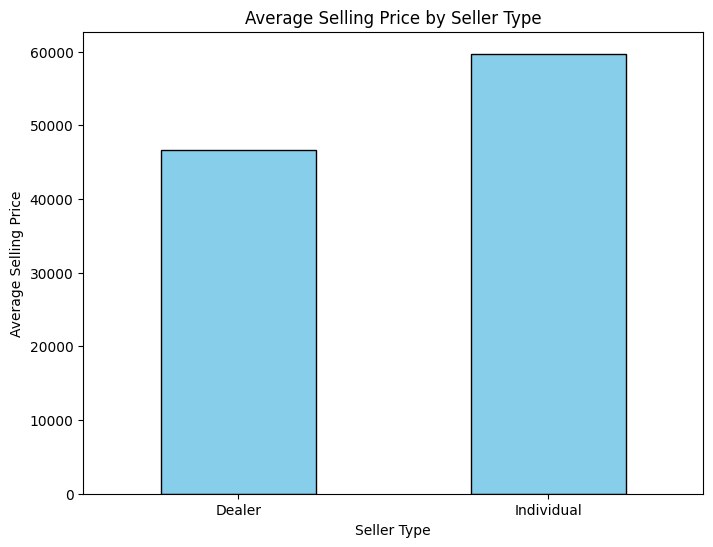

In [7]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
#Answer : 
import pandas as pd
import matplotlib.pyplot as plt

avg_price = df.groupby("seller_type")["selling_price"].mean()

# Plot
plt.figure(figsize=(8,6))
avg_price.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.show()


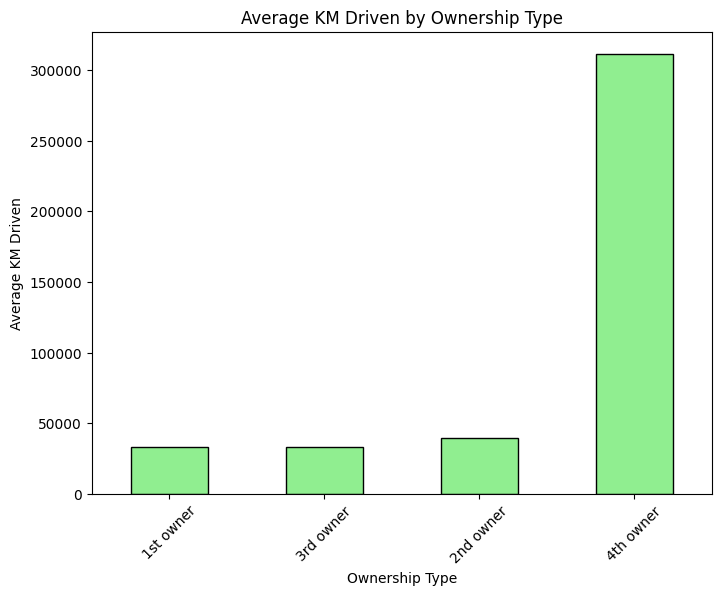

In [6]:
#Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.
#Answer : 
import matplotlib.pyplot as plt

# Group by ownership type and calculate average km_driven
avg_km = df.groupby("owner")["km_driven"].mean().sort_values()

# Plot
plt.figure(figsize=(8,6))
avg_km.plot(kind="bar", color="lightgreen", edgecolor="black")

plt.title("Average KM Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.xticks(rotation=45)
plt.show()


In [8]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
#Answer : 
# Summary statistics before removing outliers
print("Before Removing Outliers:\n", df["km_driven"].describe())


Before Removing Outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [11]:
# Calculate Q1, Q3, and IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset (remove outliers)
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]


In [12]:
print("\nAfter Removing Outliers:\n", df_no_outliers["km_driven"].describe())



After Removing Outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


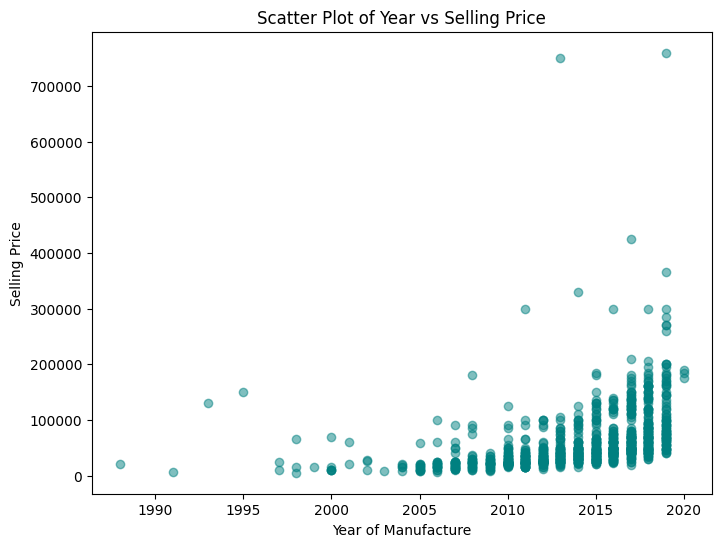

In [13]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price
#Ans : 
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["year"], df["selling_price"], alpha=0.5, color="teal")

plt.title("Scatter Plot of Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


In [14]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
#Answer : 
# One-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=True)

# Display first 5 rows
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


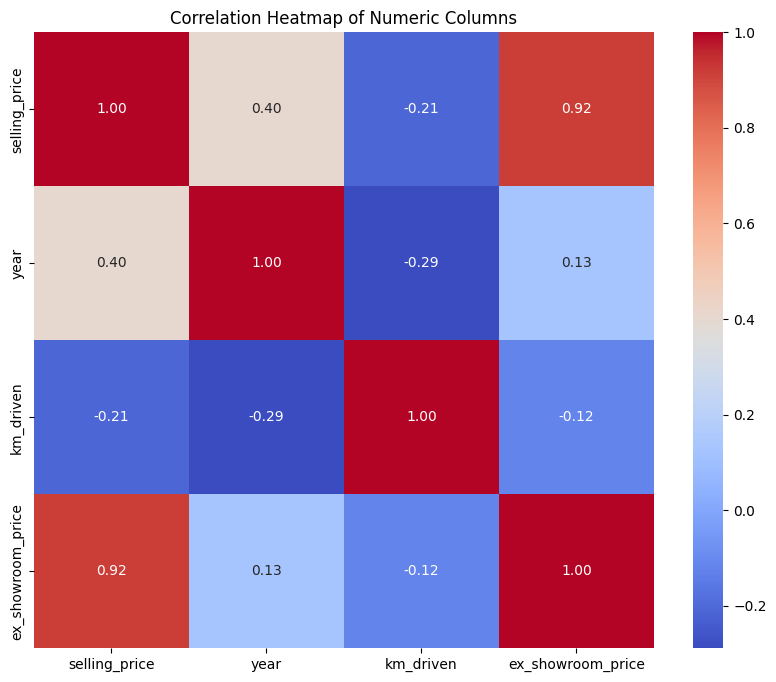

In [15]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.What correlations stand out the most?
#Answer : 
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.select_dtypes(include=["int64", "float64"]).corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [ ]:
#Question 10: Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.
#Answer : 


# 1. Important Factors Affecting a Bike's Selling Price

- Based on the analysis and visualizations:

**Year of Manufacture:**
- Newer bikes generally have a higher selling price.
- Strong positive correlation with selling price.
- Kilometers Driven (km_driven):
- Bikes with higher usage (more km) tend to have lower selling price.
- Negative correlation with selling price.
- 1. Seller Type:
- Bikes sold by Dealers or Trustmark Dealers generally have higher average prices than those sold by Individuals.
- 2. Ownership Type:
- Bikes with multiple owners (3rd, 4th, etc.) usually have higher km driven and slightly lower selling price.
**Power (cc):**
- Moderate positive effect on selling price — bikes with higher engine power tend to cost more.
- 2. Data Cleaning and Feature Engineering
**Missing Values:**
- Checked for missing values in all columns.
- Filled numerical missing values (km_driven, power) using median.
- Filled categorical missing values (owner, seller_type) using mode.
**Outlier Removal:**
- Used IQR method to remove outliers from km_driven to improve analysis reliability.
**Feature Engineering:**
- Converted seller_type into numeric columns using one-hot encoding for analysis.
- No other major feature transformations were needed.
**Visual Analysis:**
_ Scatter plots, bar plots, and correlation heatmaps used to identify key relationships.